## Review

## 0.파이썬 기본

In [36]:
# 변수
text_1 ='안녕하세요.'
text_2 = 'Aice에 오신것을 환영합니다.'

In [7]:
# print(text_1+test_2)

##### 주의
# 주석처리 할 것!!

In [37]:
# 자료형_리스트
aice_test = ['Future','Junior','Basic','Associate','Professional']
aice_test[1]


'Junior'

In [5]:
aice_test=None

In [7]:
# aice_test[1]

In [9]:
#len(): 자료형의 자료 개수


In [10]:
#type(): 타입

## 1. 데이터 분석

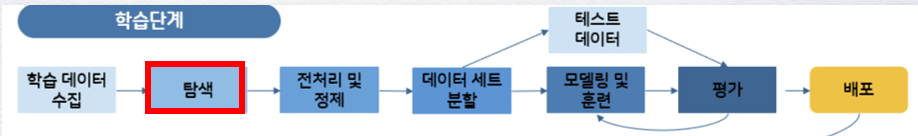

In [38]:

# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 메시지 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
#데이터 로드
odf = pd.read_csv('titanic.csv') #쥬피터 노트북과 같은 위치일 경우
# odf = pd.read_csv('./data/titanic.csv') #.은 현재위치
# odf = pd.read_csv('./data/titanic_sep.csv')
# odf = pd.read_csv('./data/titanic_sep.csv',sep="|") #구분자 지정
# odf = pd.read_csv('./data/titanic_cp949.csv')          
# odf = pd.read_csv('./data/titanic_cp949.csv',encoding='cp949') #인코딩 지정
odf.head(2)



##### 주의
# 이하의 단계에서는 제일 처음 코드 이외의 코드는 주석처리 할 것!!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [11]:
#데이터 프레임 복사
df = odf.copy()

# 일반적인 정보 파악
df.info()
'''
1. 관측치 갯수, 데이터 수, 행 수, 인스턴스 수?
2. 피쳐 수, 변수 개수, 컬럼 수?
3. 결측치 유무와 결측치 컬럼은?
4. 데이터 타입 적절성?
'''


# 요약 통계 정보 파악
'''
각 피쳐별 데이터 개수, 평균, 표준편차, 최소, 25%, 50%(중앙값), 75%, 최대
'''
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 데이터 추출 - 컬럼
# 컬럼 한개
df['Age']

# 컬럼 여러개
df[['Age','Survived']]

# 데이터 추출 - 행
df.loc[0,['Survived','Sex','Name']] #Series 추출
df.loc[ [0] ,['Survived','Sex','Name']] #데이터 프레임 추출
df.loc[ [3,9] ,['Survived','Sex','Name']]

df.iloc[0,[1,4,3]]
df.iloc[[0],[1,4,3]]
df.iloc[[3,9],[1,4,3]]

#데이터 추출 - 조건
## 성별(sex)가 여성인 데이터 추출
cond = df['Sex'] == 'female'
df[cond]

## 나이(age)가 10세 미만이거나 60이상인 사람들
cond = (df['Age'] < 10) | (df['Age'] >= 60)
df.loc[cond]
df.loc[cond,:]
df.loc[cond,['Survived','Sex']]


### 나이(age)가 10세 미만이거나 60이상인 사람들 중에서 생존한 사람만 추출(survived=1)
cond_1 = (df['Age'] < 10) | (df['Age'] >= 60)
cond_2 = df['Survived'] == 1
df.loc[cond_1 & cond_2,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S


---

In [18]:
# value_counts()
# 컬럼의 수준별 데이터 개수

df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [19]:
#정렬 - 컬럼 하나 기준
df.sort_values('Age',ascending=True) #오름차순
df.sort_values('Age',ascending=False) #내림차순

#정렬 - 컬럼 여러개 기준
df.sort_values(['Age','Fare'],ascending=False) #내림차순

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [12]:
# groupby
#항구별 탑승자 수(데이터 건수, 관측치 갯수)
df.groupby('Embarked').count()
df.groupby('Embarked').size()
df.groupby('Embarked').size().to_frame('탑승자수')

#항구별 탑승자의 평균 연령은?
df.groupby('Embarked')['Age'].mean()
df.groupby('Embarked')['Age'].mean().to_frame('평균연령')

,평균연령
Embarked,
C,30.814769
Q,28.089286
S,29.445397


---

## 2.데이터 전처리

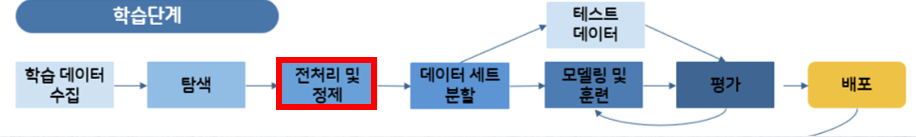

> [중요]
> * 수정 전 데이터를 확인하고 수정 후 다시 확인으로 전처리 효과를 검증할 것!!

### 2-1.컬럼 추가/삭제, 이름 수정

In [20]:
#컬럼 추가/파생변수 생성
df['familysize'] = df['SibSp'] + df['Parch']

# #컬럼 이름 변경
df.rename(columns={'familysize':'FamilySize'},inplace=True)

# #컬럼 삭제
df.drop('FamilySize',axis=1,inplace=True)

# #확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2-2.형 변환, 문자열 수정

In [30]:
df.info()

# 컬럼 형 변환
#object -> 정수로 변환
#astype()는 inplace=True 옵션 지원하지 않으므로 꼭 해당 컬럼에 재 할당해서 변경완료!! 
#컬럼안에 특수문자,문자 있으면 에러 발생하니 replace를 적용

df['PassengerId'] = df['PassengerId'].replace('_','-1')
df['PassengerId'] = df['PassengerId'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

### 2-3.결측치

In [21]:
df = odf.copy()

## 결측치 갯수
df.isnull().sum()

## 결측치 포함 데이터 보기 
## Age컬럼에서 null인 데이터 추출
df.loc[df['Age'].isnull(),:]

## 결측치 채우기-특정값으로
fdf = df.fillna({'Age':0}) 
fdf.isnull().sum()
fdf['Age'].mean() #결측치 처리 후 평균나이


## 결측치 채우기-평균값으로
fdf = df.fillna({'Age':df['Age'].mean()}) 
fdf['Age'].mean()

## 결측치 모두 삭제하기
fdf = df.dropna()
fdf.isnull().sum()

## 결측치 삭제-특정컬럼 기준
fdf = df.dropna(subset=['Age']) 
fdf.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

### 2-4.스케일링

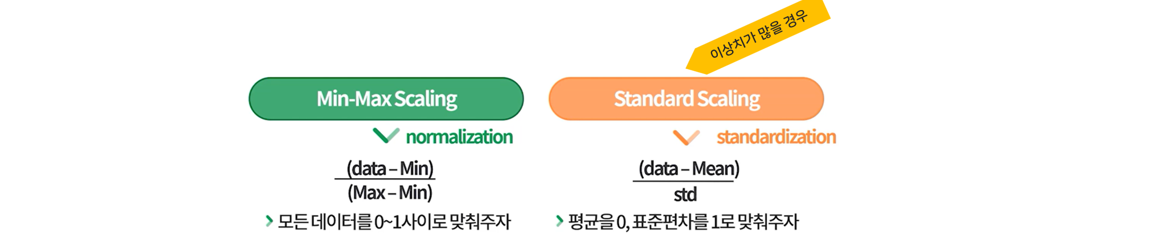

In [31]:
odf = pd.read_csv('./data/auto-mpg.csv')
odf.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


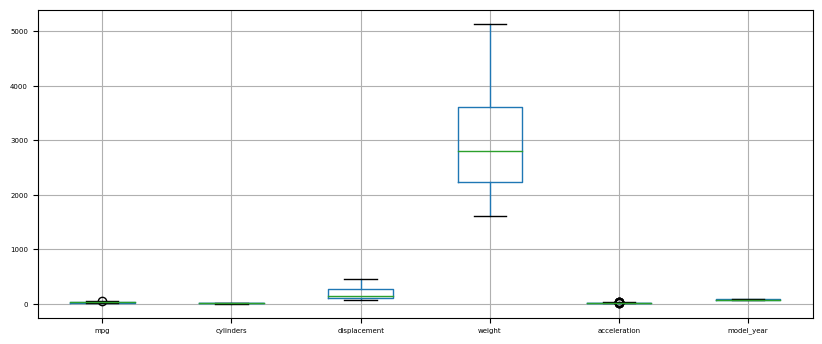

In [32]:
df = odf.copy()
plt.figure(figsize=(10,4))
df.boxplot(fontsize=5) 
plt.show()
#weight의 값범위가 너무커 상대적으로 다른 피처의 특성을 살펴볼 수 없다. 
#머신러닝,딥러닝 학습시 큰 값을 가지는 변수에 가중치가 부여(변수 영향도가 크다)함
#모든 피처의 영향도를 동등하게 만들어 주기위해 스케일 작업이 필요

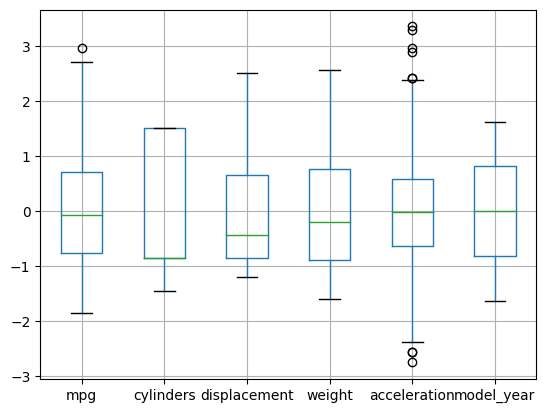

In [ ]:
## 스케일링:표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)


## 스케일 후 확인 코드
ss_df = pd.DataFrame(data=scaled, columns=df.columns)
ss_df.describe()
ss_df.boxplot()
plt.show()

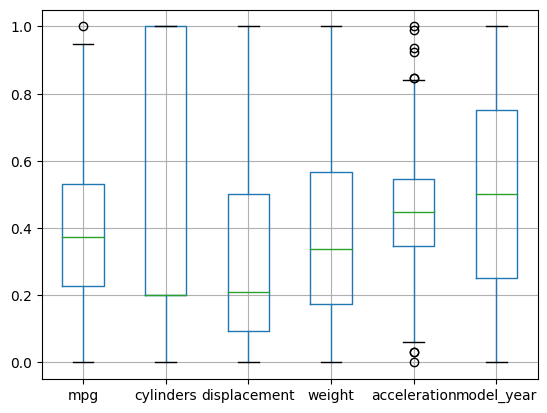

In [ ]:
## 스케일링:정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

## 스케일 후 확인 코드
mm_df = pd.DataFrame(data=scaled, columns=df.columns)
mm_df.describe()
mm_df.boxplot()
plt.show()

### 2-5.인코딩

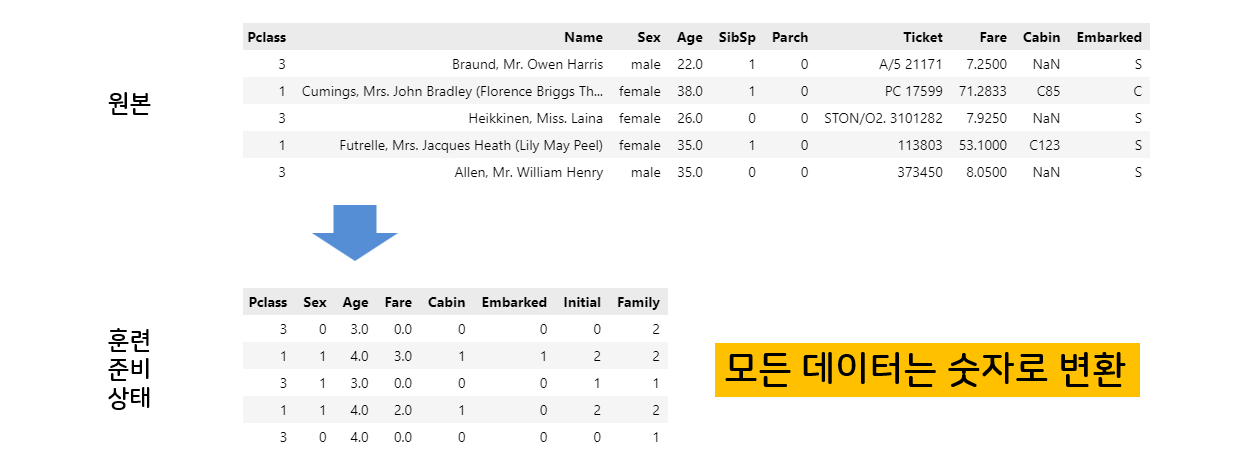

In [28]:
import pandas as pd

In [47]:
## 인코딩
#pandas에서는 get_dummies함수를 사용하면 쉽게 One-Hot Encording이 가능

df = pd.read_csv('./data/titanic.csv')

#원-핫 인코딩
pd.get_dummies(df)

#타입 지정: object 컬럼만 진행
cal_cols = df.select_dtypes('object').columns.values
pd.get_dummies(df,columns=cal_cols)

#다중공선성 문제 해결
pd.get_dummies(df, drop_first=True)

#True/False -> 1,0 정수로 표현
pd.get_dummies(df, dtype='int',drop_first=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# 라벨 인코딩-DataFrame replace함수
df = pd.read_csv('./data/titanic2.csv')

df['Survived'].value_counts()

df['Survived'] = df['Survived'].replace(['Dead','Survived'],[0,1])

df['Survived'].value_counts()

C:\Users\miran\AppData\Local\Temp\ipykernel_26780\2911636876.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Survived'] = df['Survived'].replace(['Dead','Survived'],[0,1])


Survived
1    3
0    2
Name: count, dtype: int64

In [35]:
# 라벨 인코딩-사이킷런 LabelEncoder 클래스 사용

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./data/titanic2.csv')

le = LabelEncoder()
df['Survived'] = le.fit_transform(df['Survived'])
df['Survived'].value_counts()

Survived
1    3
0    2
Name: count, dtype: int64

---

## 3. 모델링

모델링 코드는 패턴이 있어 쉽습니다. 

단, 아래의 tip을 고려해서 진행합니다. 

1. 내가 받은 데이터는 분류인가? 회귀인가? 구분이 제일 중요!!!
2. 평가 지표 해석(높아야 좋은지, 낮아야 좋은지)
3. 특정 알고리즘을 사용하라는 말 없으면 RandomForest가 무난함.
4. 성능개선 문항이 있을 수 있으니, 성능 개선 여지가 있도록 처음에는 약간 underfitting 시킴.


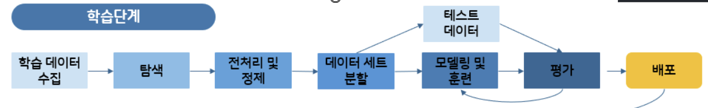

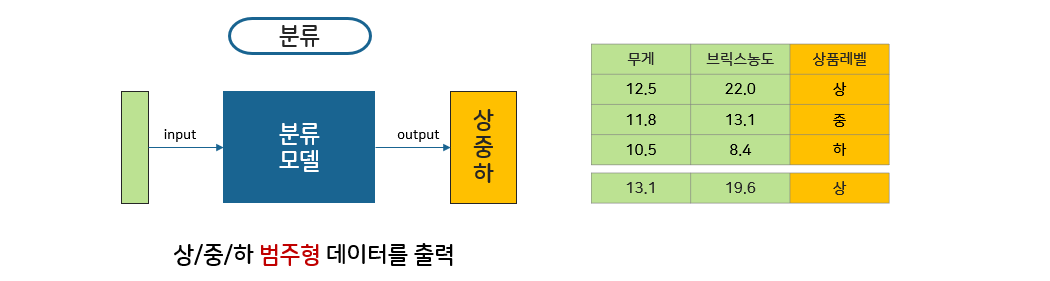

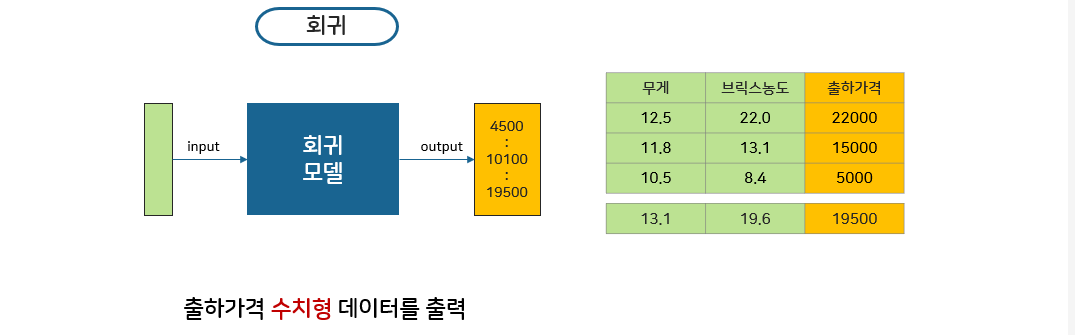

##### <font color=red> **[매우 중요] 분류인가? 회귀인가?** </font>

In [44]:
df = pd.read_csv('./data/auto-mpg.csv')#타깃 mpg
df = pd.read_csv('./data/titanic_pre.csv') #타깃 survived
df = pd.read_csv('./data/iris.csv') #타깃 species
df.sample(10)

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
31,0,3,40.0,9.4750,0,0,1
177,0,2,27.0,13.0000,1,0,1
94,0,2,21.0,73.5000,1,0,1
2,1,3,26.0,7.9250,0,0,1
671,0,3,34.5,6.4375,1,0,0
63,1,2,17.0,10.5000,0,0,1
330,1,1,33.0,90.0000,0,1,0
403,0,3,28.0,22.5250,1,0,1
489,1,1,42.0,52.5542,1,0,1
196,0,1,44.0,90.0000,1,1,0


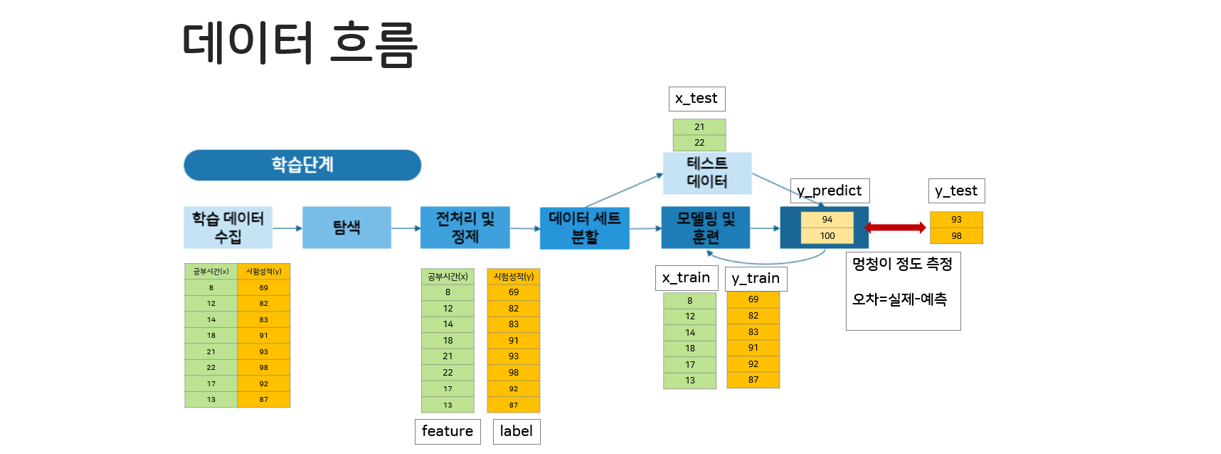

## 3-1-1.머신러닝_회귀

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split

#회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#회귀 평가지표
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')
##########데이터 로드

df = pd.read_csv('./data/auto-mpg.csv')

##########데이터 분석 및 전처리

#결측치,이상치
#형변환
#Feature enginearing(파생변수 생성,스케일링,구간화,피쳐 셀렉션)
#인코딩

##########데이터 분리

#피쳐와 레이블 분리
y_data = df['mpg'] #레이블
x_data = df.drop(['mpg'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

##########모델 생성

# model = LinearRegression() #피쳐와 타깃과의 선형관계 학습
# model = DecisionTreeRegressor(max_depth=5, min_samples_split=4,random_state=42) #의사결정 
model = RandomForestRegressor(n_estimators=10, max_depth=10,random_state=42) #앙상블 알고리즘

##########모델 학습

model.fit(x_train, y_train)

##########모델 성능 평가

y_predict = model.predict(x_test)

R2 = r2_score(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict,squared=True)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MAE = mean_absolute_error(y_test,y_predict)

print(f' R^2_1근접: {R2:.3F}, MSE_저: {MSE:.3f}, RMSE_저: {RMSE:.3F}, MAE_저: {MAE:.3F}')


(398,) (398, 5)
 R^2_1근접: 0.826, MSE_저: 9.530, RMSE_저: 3.087, MAE_저: 2.347


## 3-1-2.머신러닝_이진 분류

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split   

#분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#분류 평가지표
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

df = pd.read_csv('./data/titanic_pre.csv')

# labels = ['사망', '생존']

##########데이터 분석 및 전처리
#결측치 제거
#형변환
#Feature enginearing(파생변수,스케일링,구간화,피쳐 셀렉션)
#인코딩
##########데이터 분리

#피쳐와 레이블 분리
y_data = df['Survived'] #레이블
x_data = df.drop(['Survived'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_data 레이블 균형적으로 분할되도록--->!!!!!중요!!!!

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777,stratify=y_data)

##########모델 생성

# model = LogisticRegression()
# model = KNeighborsClassifier(n_neighbors=5)
# model = DecisionTreeClassifier(max_depth=3,min_samples_split=2,random_state=42)
model = RandomForestClassifier(n_estimators=3, max_depth=3,random_state=42)



##########모델 학습

model.fit(x_train, y_train)

##########모델 성능 평가

y_predict = model.predict(x_test)

confusion = confusion_matrix( y_test, y_predict)
accuracy = accuracy_score(y_test , y_predict) #정확도
precision = precision_score(y_test , y_predict) #정밀도
recall = recall_score(y_test , y_predict)  #재현율
f1score = f1_score(y_test , y_predict)   #정밀도,재현율 균형

print('오차행렬')
print(confusion)

print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1score: {f1score:.4f}')
print(classification_report(y_test,y_predict))


(712,) (712, 6)
오차행렬
[[123   4]
 [ 38  49]]
정확도: 0.8037, 정밀도: 0.9245, 재현율: 0.5632, F1score: 0.7000
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       127
           1       0.92      0.56      0.70        87

    accuracy                           0.80       214
   macro avg       0.84      0.77      0.78       214
weighted avg       0.83      0.80      0.79       214



## 3-1-3.머신러닝-다중분류

In [40]:
import pandas as pd
import numpy as np

#데이터 분할
from sklearn.model_selection import train_test_split   

#분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#분류 평가지표
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

df = pd.read_csv('./data/iris_pre.csv')

# labels = ['setosa','versicolor','virginica']

##########데이터 분석 및 전처리
#결측치 제거
#형변환
#Feature enginearing(파생변수,스케일링,구간화,피쳐 셀렉션)
#인코딩
##########데이터 분리

#피쳐와 레이블 분리
y_data = df['species'] #레이블
x_data = df.drop(['species'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_data 레이블 균형적으로 분할되도록
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777,stratify=y_data)

##########모델 생성

# model = LogisticRegression()
# model = KNeighborsClassifier(n_neighbors=5)
# model = DecisionTreeClassifier(max_depth=3,min_samples_split=2,random_state=42)
model = RandomForestClassifier(n_estimators=3, max_depth=3,random_state=42)


##########모델 학습

model.fit(x_train, y_train)

##########모델 성능 평가

y_predict = model.predict(x_test)

confusion = confusion_matrix( y_test, y_predict)
accuracy = accuracy_score(y_test , y_predict) #정확도
precision = precision_score(y_test , y_predict, average='macro') #정밀도
recall = recall_score(y_test , y_predict,average='macro')       #재현율
f1score = f1_score(y_test , y_predict,average='macro')          #정밀도,재현율 균형

print('오차행렬')
print(confusion)

print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1score: {f1score:.4f}')
print(classification_report(y_test,y_predict))


(150,) (150, 4)
오차행렬
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
정확도: 0.9333, 정밀도: 0.9345, 재현율: 0.9333, F1score: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## 3-2-1.딥러닝-회귀

In [42]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split   

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(100)

########데이터 로드

df = pd.read_csv('./data/auto-mpg.csv')


##########데이터 분석 및 전처리
#결측치 제거
#형변환
#Feature enginearing(파생변수,스케일링,구간화,피쳐 셀렉션)
#인코딩

##########데이터 분리
#피쳐와 레이블 분리
y_data = df['mpg'] #타깃
x_data = df.drop(['mpg'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

########모델 (model) 구축

model = Sequential() 

model.add(Dense(units=16, activation='relu',input_shape=(x_train.shape[1],)))  
model.add(Dropout(0.3)) #과적합방지
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3)) #과적합방지
model.add(Dense(units=1, activation='linear')) #------->회귀 


########모델 (model) 컴파일 및 summary

model.compile(loss='mse',optimizer=Adam(),metrics=['mae'])#------->회귀 
model.summary()

########모델 학습

hist = model.fit(x_train, y_train, epochs=50 ,batch_size=15, validation_data=(x_test, y_test))

######################   조기종료, 모델 저장, 과적합 방지 언급시 사용 ####################
######################   아래의 코드를 실행할 시, fit() 코드는 주석처리 필요 #############
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',save_best_only=True)

# hist = model.fit(x_train, y_train, epochs=50, batch_size=15, 
#                     validation_data=(x_test, y_test),
#                     callbacks=[early_stop,check_point])

########모델 평가
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE:{loss:.3f} MAE:{mae:.3f}')


(398,) (398, 5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


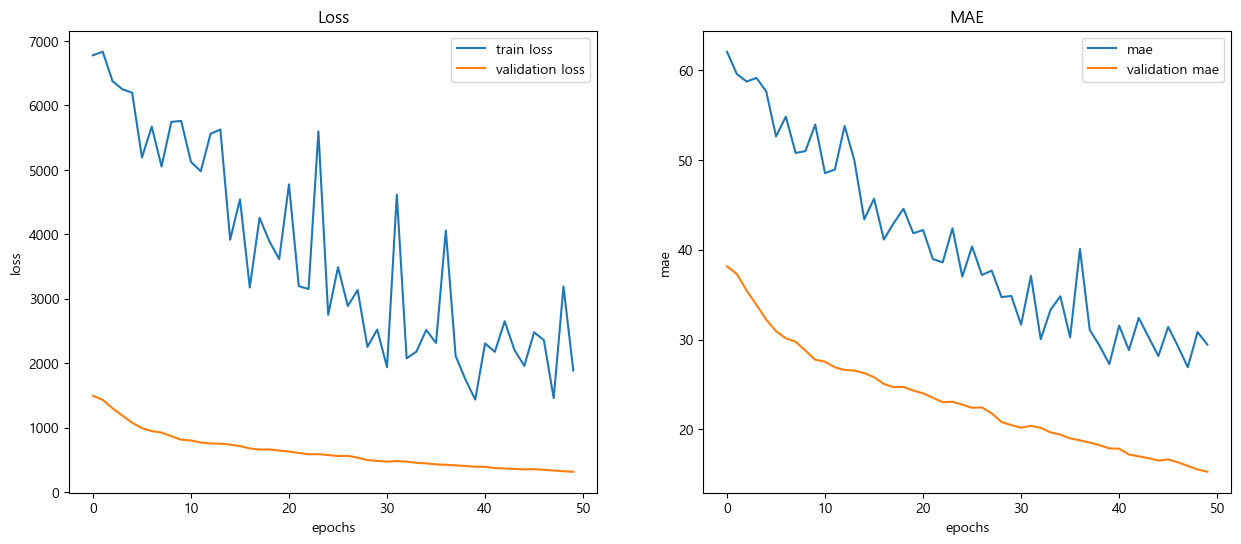

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['mae'],label='mae')
plt.plot(hist.history['val_mae'],label='validation mae')
plt.title('MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 690 to 195
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      498 non-null    int64  
 1   Age         498 non-null    float64
 2   SibSp       498 non-null    int64  
 3   Parch       498 non-null    int64  
 4   Fare        498 non-null    float64
 5   Sex_male    498 non-null    bool   
 6   Embarked_Q  498 non-null    bool   
 7   Embarked_S  498 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 24.8 KB


## 3-2-2. 딥러닝-이진분류

In [1]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split   

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

########데이터 로드

df = pd.read_csv('./data/titanic_pre.csv')
labels = ['사망', '생존']

##########데이터 분석 및 전처리
#결측치 제거
#형변환
#Feature enginearing(파생변수,스케일링,구간화,피쳐 셀렉션)
#인코딩
##########데이터 분리

#피쳐와 레이블 분리
y_data = df['Survived'] #레이블
x_data = df.drop(['Survived'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_data 레이블 균형적으로 분할되도록
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777,stratify=y_data)


########모델 (model) 구축

model = Sequential()   

model.add(Dense(units=12, activation='relu',input_shape=(x_train.shape[1], )))
model.add(Dropout(0.3))#과적합방지
model.add(Dense(units=4,activation='relu'))  
model.add(Dropout(0.3))#과적합방지
model.add(Dense(units=1,activation='sigmoid')) #------->이진 분류 



########모델 (model) 컴파일 및 summary

model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])#------------>이진분류
model.summary()

########모델 학습

hist = model.fit(x_train, y_train, epochs=50 ,batch_size=15, validation_data=(x_test, y_test))

######################   조기종료, 모델 저장, 과적합 방지 언급시 사용 ####################
######################   아래의 코드를 실행할 시, fit() 코드는 주석처리 필요 #############

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',save_best_only=True)

# hist = model.fit(x_train, y_train, epochs=50, batch_size=15, 
#                     validation_data=(x_test, y_test),
#                     callbacks=[early_stop,check_point])


#######모델 평가
loss,acc = model.evaluate(x_test, y_test)
print(f'정확도: {acc:.3f}') 



(712,) (712, 6)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 52        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Ep

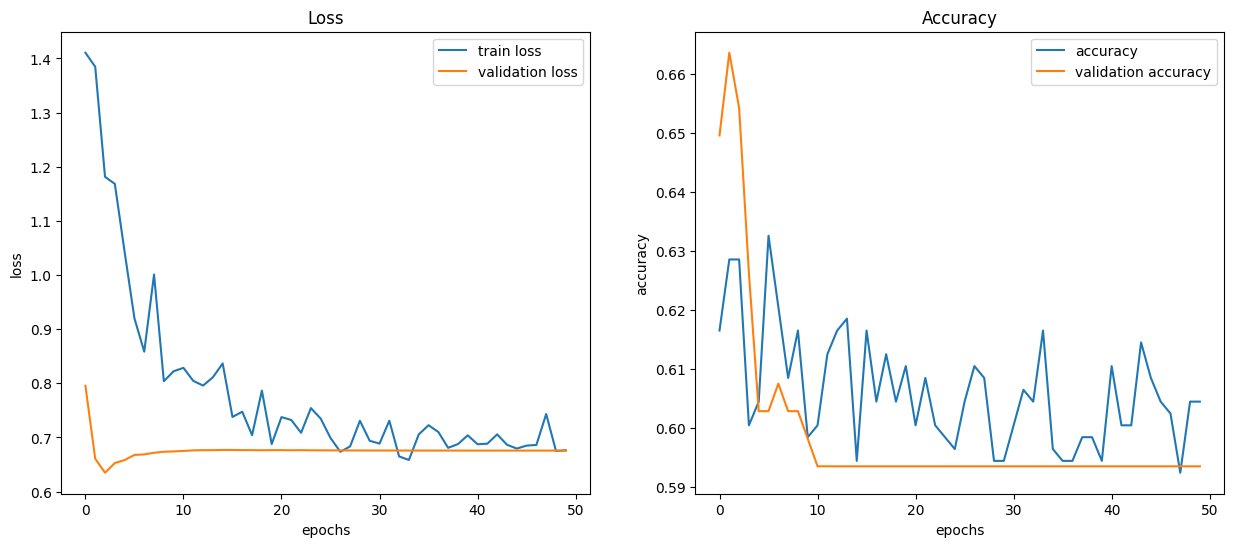

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

## 3-3-3. 딥러닝-다중분류

In [3]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split   

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

########데이터 로드

df = pd.read_csv('./data/iris_pre.csv')

labels = ['setosa', 'versicolor','virginica']

##########데이터 분석 및 전처리
#결측치 제거
#형변환
#Feature enginearing(파생변수,스케일링,구간화,피쳐 셀렉션)
#인코딩
##########데이터 분리
#피쳐와 레이블 분리
y_data = df['species'] #레이블
x_data = df.drop(['species'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_data 레이블 균형적으로 분할되도록

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777,stratify=y_data)

########모델 (model) 구축

model = Sequential()   

model.add(Dense(units=8, activation='relu',input_shape=(x_train.shape[1], ))) #입력/히든 
model.add(Dropout(0.3))#과적합방지
model.add(Dense(units=4,activation='relu'))  
model.add(Dropout(0.3))#과적합방지
model.add(Dense(units=3,activation='softmax')) #------->다중 분류 

########모델 (model) 컴파일 및 summary

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])#---->다중분류:레이블에 라벨 인코딩 적용시 사용
# model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])#--->다중분류:레이블에 원핫인코딩 적용시 사용
model.summary()

########모델 학습

hist = model.fit(x_train, y_train, epochs=50 ,batch_size=15, validation_data=(x_test, y_test))

######################   조기종료, 모델 저장, 과적합 방지 언급시 사용 ####################
######################   아래의 코드를 실행할 시, fit() 코드는 주석처리 필요 #############
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',save_best_only=True)

# hist = model.fit(x_train, y_train, epochs=50, batch_size=15, 
#                     validation_data=(x_test, y_test),
#                     callbacks=[early_stop,check_point])


#######모델 평가
loss,acc = model.evaluate(x_test, y_test)
print(f'정확도: {acc:.3f}')                  


(150,) (150, 4)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Ep

7/7 [==============================] - 1s 22ms/step - loss: 2.1414 - accuracy: 0.3048 - val_loss: 1.9328 - val_accuracy: 0.3333
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 2.5513 - accuracy: 0.2762 - val_loss: 1.8173 - val_accuracy: 0.3333
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.8331 - accuracy: 0.4381 - val_loss: 1.7198 - val_accuracy: 0.3333
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 1.9537 - accuracy: 0.4095 - val_loss: 1.6359 - val_accuracy: 0.3333
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 1.8206 - accuracy: 0.4000 - val_loss: 1.5632 - val_accuracy: 0.3333
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 1.8815 - accuracy: 0.3429 - val_loss: 1.4999 - val_accuracy: 0.3333
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 1.8726 - accuracy: 0.3619 - val_loss: 1.4440 - val_accuracy: 0.3333
Epoch 8/50
7/7 [============================

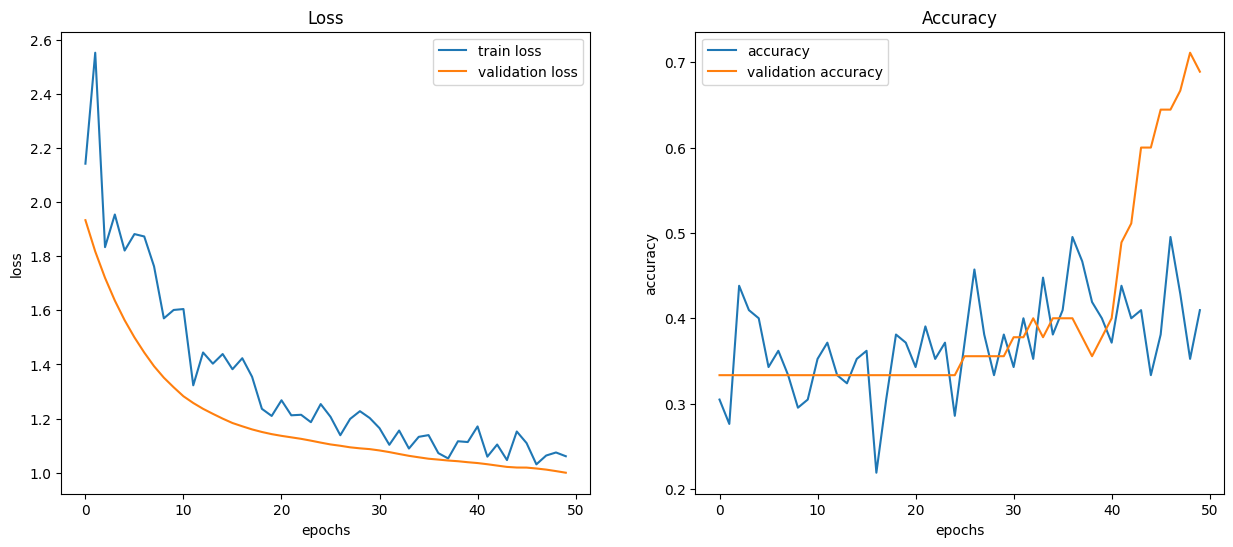

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

## 4.Matplotlib

In [2]:
df = pd.read_csv('titanic.csv')

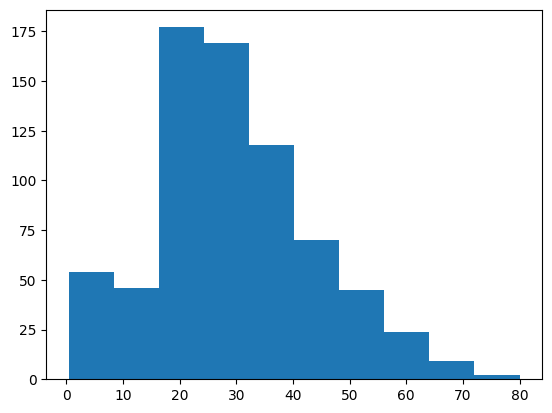

In [10]:
#수치형 피쳐에 대한 그래프
# df['Age'].hist()

plt.hist(df['Age'],bins=10)
plt.show()

<Axes: >

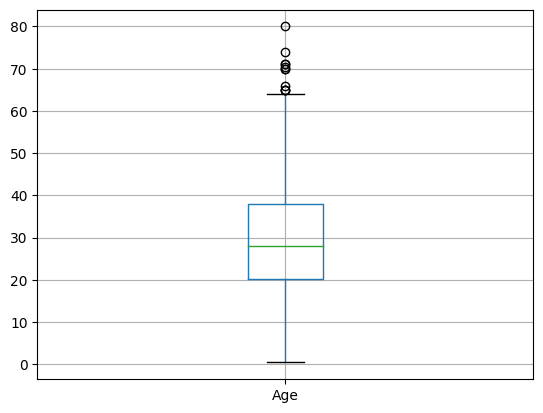

In [11]:
# 수치형 데이터
df.boxplot(['Age'])

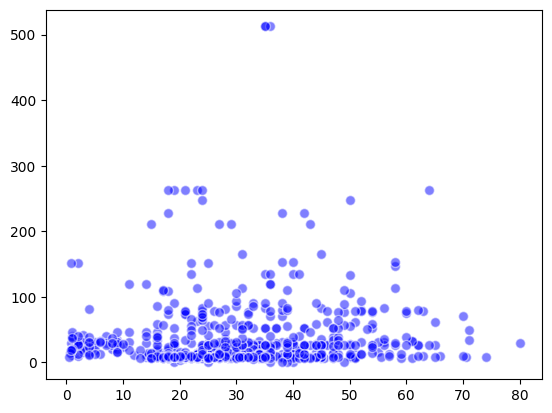

In [14]:
#나이와 요금과의 관계
plt.scatter(x=df['Age'], y=df['Fare'], alpha=0.5, color='blue', edgecolors='w', s=50)


<Axes: xlabel='Survived'>

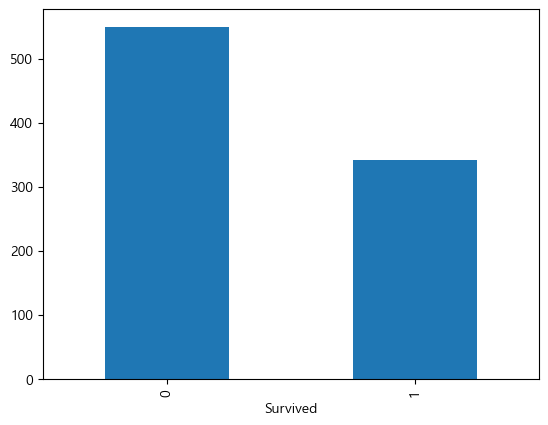

In [64]:
#Survived의 class 분포
df['Survived'].value_counts().plot(kind='bar')

## 5.Seaborn

상관관계를 확인하기 위해서 주의해야 할 점은 모든 데이터가 'continous'해야 한다는 점입니다.     
corr()은 상관관계를 측정 할 수 있는 함수입니다.

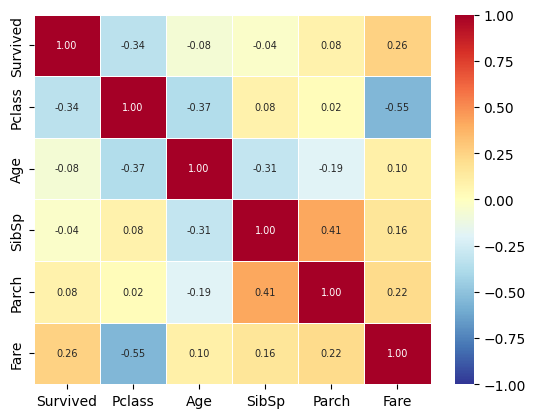

In [16]:
import seaborn as sns
#python 버전 3.10이상
sns.heatmap(df.corr(numeric_only=True),annot=True, annot_kws={'size':7}, cmap=plt.cm.RdYlBu_r, fmt=".2f", linewidth=.5,vmin=-1.0,square=False)

plt.show()

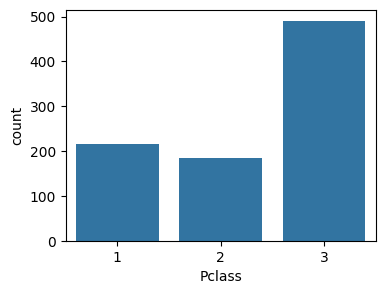

In [26]:
# countplot - 특정 변수의 각 카테고리별 빈도수 시각화
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Pclass')
plt.show()

<Figure size 640x480 with 0 Axes>

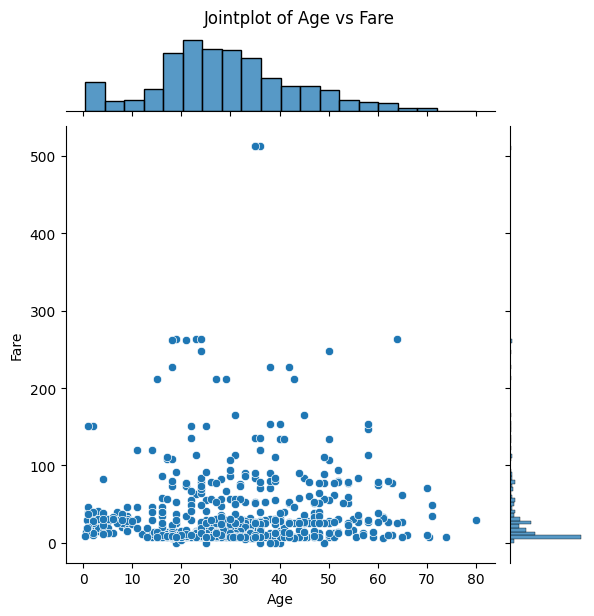

In [27]:
# jointplot - 두 변수의 관계를 산점도와 히스토그램으로 시각화
plt.figure()
sns.jointplot(data=df, x='Age', y='Fare', kind='scatter')
plt.suptitle("Jointplot of Age vs Fare", y=1.02)
plt.show()

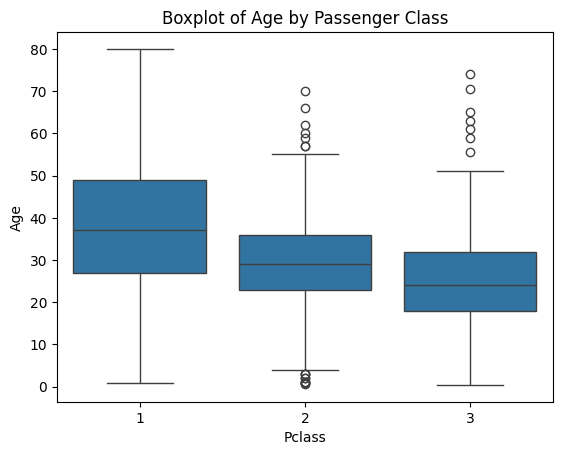

In [25]:
# boxplot - 특정 변수의 범주별 분포를 상자 수염 그래프로 시각화
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title("Boxplot of Age by Passenger Class")
plt.show()